In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import time
import nibabel as nib
import ctvis
from glob import glob
from pathlib import Path
from tqdm import tqdm
from multiprocessing import Pool, cpu_count

In [2]:
# DataFrameを作成　（script file からの読み込み） / ctvis.get_df_all()
ctvis.get_df_all('../public-covid-data')

,FilePathImage,FileName,FilePathMask
0,../public-covid-data/rp_im/1.nii.gz,1.nii.gz,../public-covid-data/rp_msk/1.nii.gz
1,../public-covid-data/rp_im/2.nii.gz,2.nii.gz,../public-covid-data/rp_msk/2.nii.gz
2,../public-covid-data/rp_im/3.nii.gz,3.nii.gz,../public-covid-data/rp_msk/3.nii.gz
3,../public-covid-data/rp_im/4.nii.gz,4.nii.gz,../public-covid-data/rp_msk/4.nii.gz
4,../public-covid-data/rp_im/5.nii.gz,5.nii.gz,../public-covid-data/rp_msk/5.nii.gz
5,../public-covid-data/rp_im/6.nii.gz,6.nii.gz,../public-covid-data/rp_msk/6.nii.gz
6,../public-covid-data/rp_im/7.nii.gz,7.nii.gz,../public-covid-data/rp_msk/7.nii.gz
7,../public-covid-data/rp_im/8.nii.gz,8.nii.gz,../public-covid-data/rp_msk/8.nii.gz
8,../public-covid-data/rp_im/9.nii.gz,9.nii.gz,../public-covid-data/rp_msk/9.nii.gz


In [3]:
df = ctvis.get_df_all('../public-covid-data')

([], <a list of 0 Text yticklabel objects>)

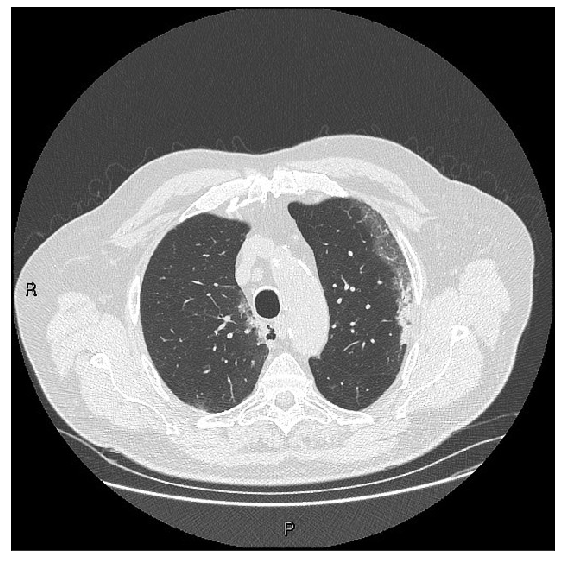

In [4]:
# NifTI データを NumPy Array としてロードする　（script file からの読み込み） / ctvis.load_nifti()
sample_path = df['FilePathImage'].iloc[0]
data = ctvis.load_nifti(sample_path)
plt.figure(figsize=(10, 10))
plt.imshow(data[:, :, 10], cmap='gray')
plt.xticks(ticks=[])
plt.yticks(ticks=[])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


([], <a list of 0 Text yticklabel objects>)

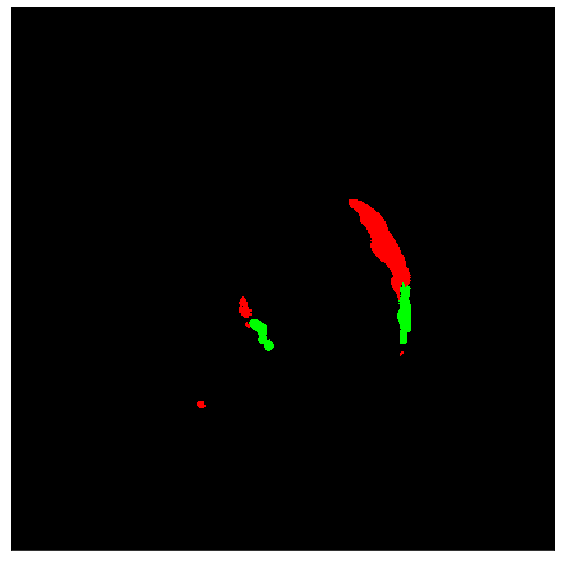

In [5]:
# mask data を RGB にする （script file からの読み込み） / ctvis.label_color()
p = df['FilePathMask'].iloc[0]
seg_data = ctvis.load_nifti(p)
mask_color = ctvis.label_color(seg_data)
plt.figure(figsize=(10, 10))
plt.imshow(mask_color[:, :, 10])
plt.xticks(ticks=[])
plt.yticks(ticks=[])

([], <a list of 0 Text yticklabel objects>)

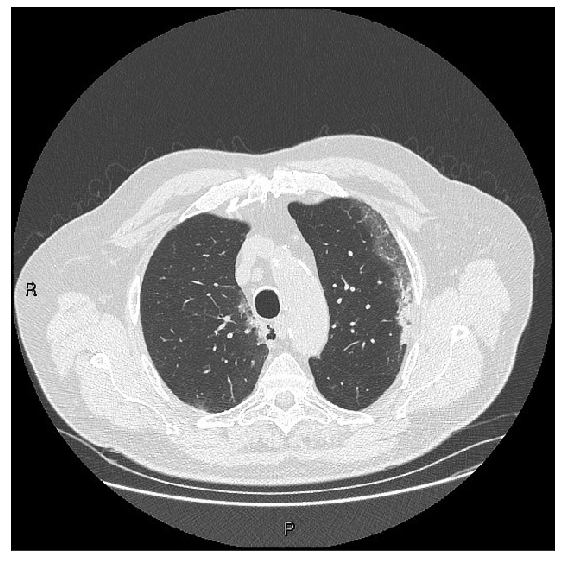

In [6]:
# HUをgrayに変換する （script file からの読み込み） / ctvis.hu_to_gray()
index = 0
volume = ctvis.load_nifti(df.iloc[index]['FilePathImage'])
mask = ctvis.load_nifti(df.iloc[index]['FilePathMask'])
mask_color = ctvis.label_color(mask)
volume_gray = ctvis.hu_to_gray(volume)
plt.figure(figsize=(10, 10))
plt.imshow(volume_gray[:, :, 10])
plt.xticks(ticks=[])
plt.yticks(ticks=[])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


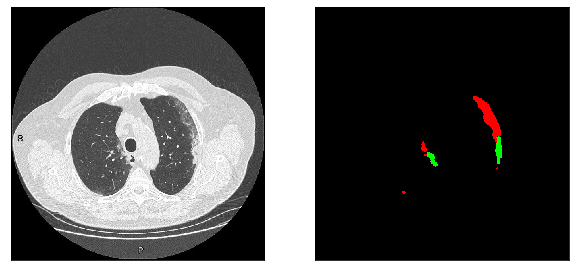

In [7]:
data = [volume_gray[:, :, 10], mask_color[:, :, 10]]
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
for idx, i in enumerate(data):
    axes[idx].imshow(i, cmap='gray')
    axes[idx].set_xticks(ticks=[])  # 横軸のメモリを消す
    axes[idx].set_yticks(ticks=[])  # 縦軸のメモリを消す

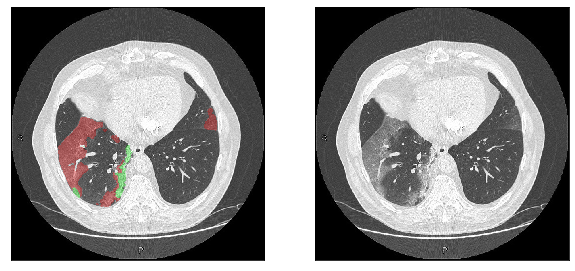

In [8]:
# Overlay(CTとアノテーションの重ね合わせ) : script file からの読み込み） / ctvis.overlay()
overlayed = ctvis.overlay(volume_gray, mask, mask_color, alpha=0.3)
data = [overlayed[:, :, 30], volume_gray[:, :, 30]]
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
for idx, i in enumerate(data):
    axes[idx].imshow(i, cmap='gray')
    axes[idx].set_xticks(ticks=[])  # 横軸のメモリを消す
    axes[idx].set_yticks(ticks=[])  # 縦軸のメモリを消す